
Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
# Name format: Last name, First name
NAME = "Chakrya Ros"
COLLABORATORS = ""

---

# Hands-On KNN
***

In this notebook we'll investigate Scikit-Learn's implementation of K-Nearest Neighbors. In addition, we'll look at how we can evaluate the performance our classifiers with a confusion matrix.  

**Names**:

**At the end of class, each student should upload this notebook to Canvas to receive participation points.**


**Ack**: Based on initial work by Chris Ketelsen, Chenhao Tan

In [4]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from matplotlib import colors
# %matplotlib inline

In [5]:
# ----------------------------------------------------
# Helper functions - Run this cell and move on to the one below
# ----------------------------------------------------

def load_iris(standardize=False, random_state=1234): 
    np.random.seed(random_state)
    
    # Load the data and grab first two features 
    iris = datasets.load_iris()
    X, y = iris.data[:,:2], iris.target 
        
    # Randomly split into validation and training sets 
    ones = np.ones(50, dtype=int)
    valid_mask = np.full(50, False)
    valid_mask[np.random.choice(range(50), replace=False, size=16)] = True 
    train_mask = np.logical_not(valid_mask)
    X_train = np.concatenate((X[y==0][train_mask], X[y==1][train_mask], X[y==2][train_mask]))
    y_train = np.concatenate((0 * ones[train_mask], 1 * ones[train_mask], 2 * ones[train_mask]))
    X_valid = np.concatenate((X[y==0][valid_mask], X[y==1][valid_mask], X[y==2][valid_mask]))
    y_valid = np.concatenate((0 * ones[valid_mask], 1 * ones[valid_mask], 2 * ones[valid_mask]))
    
    # Standardize data if desired 
    if standardize: 
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
    return X_train, y_train, X_valid, y_valid, iris.target_names
    
def plot_iris(X, y):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    name_color_dict = {
        0: ("steelblue", "setosa"),
        1:("#a76c6e", "versicolor"),
        2:("#6a9373", "virginica")
    }
    for k in [0,1,2]:
        ax.scatter(X[y==k, 0], X[y==k, 1], color=name_color_dict[k][0],
                   s=100, label=name_color_dict[k][1])
    ax.grid(alpha=0.25)
    ax.legend(loc="upper right", fontsize=16)
    ax.set_xlabel("sepal length (cm)", fontsize=16)
    ax.set_ylabel("sepal width (cm)", fontsize=16)
    
def plot_knn_boundary(X, y, model, fig, ax):
    #fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    
    name_color_dict = {
        0: ("steelblue", "setosa"),
        1:("#a76c6e", "versicolor"),
        2:("#6a9373", "virginica")
    }
    for k in [0,1,2]:
        ax.scatter(X[y==k, 0], X[y==k, 1], color=name_color_dict[k][0],
                   s=100, label=name_color_dict[k][1], edgecolors="white", zorder=2)
    
    # Plot the decision boundary. 
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.025), np.arange(y_min, y_max, 0.025))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Define custom colormap 
    cmap = colors.ListedColormap(['steelblue', '#a76c6e', '#6a9373'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.5, zorder=1)

    ax.legend(loc="upper right", fontsize=16)
    ax.set_xlabel("sepal length (cm)", fontsize=16)
    ax.set_ylabel("sepal width (cm)", fontsize=16)

### Part 1: Classifying Iris Species 
***

In this problem we'll use K-Nearest Neighbors to classify species of irises based on certain physical characteristics.  The so-called [_iris dataset_](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a popular dataset for prototyping classification algorithms. We can load the iris dataset from Scikit-Learn directly. The dataset contains four features: sepal length, sepal width, pedal length, and pedal width and three classes defined by the species of iris: setosa, versicolor, and virginica. We'll only use the sepal dimensions so that we can easily visualize the data. 

Execute the following code cell to load training and validation sets for the iris data set and then plot the data.    

classes =  ['setosa' 'versicolor' 'virginica']


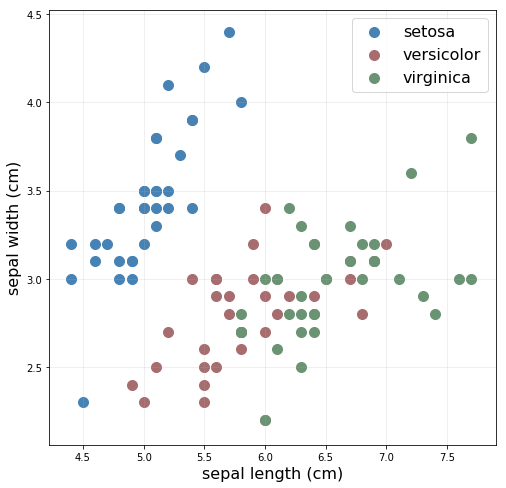

In [6]:
X_train, y_train, X_valid, y_valid, target_names = load_iris()
print("classes = ", target_names)
plot_iris(X_train, y_train)

**Part A: Basic dataset familarization**: How many examples are in the training set?  How many examples belong to each of the three classes? Write code to print the shapes of the matrices X_train and y_train.

Hint: `X_train` and `y_train` are Numpy n-dimensional arrays. Use the .shape() function.

In [7]:
# YOUR CODE HERE
print(X_train.shape)
print(y_train.shape)

(102, 2)
(102,)


**Part B: Use Sk-Learn Classifier**: Next we'll train a KNN classifier to predict iris species based on the sepal measurement features.  The KNN classifier in Scikit-Learn is called [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).  Go now and check out the documentation. Define and fit a model with $K=3$ to the training set.  The `plot_knn_boundary` function will then plot the KNN decision boundary against the data. 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def build_model(X_train, y_train, num_neighbors : int):
    '''
    build_model
    args:
          X_train : Numpy array (INSERT ARRAY DIMENSIONS HERE)
          Y_train : Numpy array (INSERT ARRAY DIMENSIONS HERE)
          num_neighbors : python integer, the k in "knn"
    returns: sk-learn KNeighborsClassifier object that has been fitted
    '''
    # YOUR CODE HERE
    knn = KNeighborsClassifier(num_neighbors)
    knn.fit(X_train, y_train)
    return knn

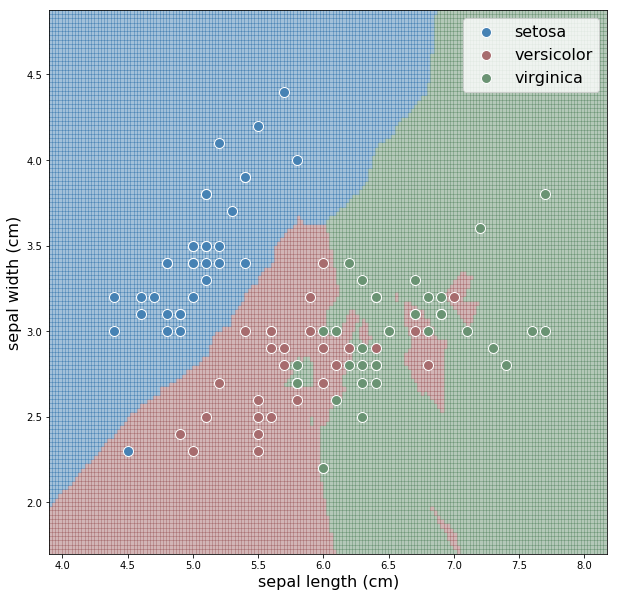

In [13]:
# These tests are a sanity-check that your code meets the spec. They are not exhaustive tests.
knn = build_model(X_train, y_train, 3)

assert(type(knn) == KNeighborsClassifier)
ex_0_prediction = knn.predict(X_train[None, 0, :])
assert(ex_0_prediction == 0)

# Here's how we recommend initializing all your plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

# For this notebook we provide a helper function for plotting.
plot_knn_boundary(X_train, y_train, knn, fig, ax)

**Part C**: Play with the value of $K$ above.  How does the character of the decision boundary change with $K$? 

Solution Comments (IMPORTANT)
1. If we had been more thorough in our exploration of the dataset in the first part, we may have discovered that our dataset contains data points which are identical in features, but differ in labels. If this happens when K=1, you may see a some points which look mislabeled. There's just another point hidden behind the ones on the graph. One way you can see this is by adding some very low variance Gaussian noise to the data points, so that you don't have any duplicates in the feature space. We show both below.
2. Note that in this part, we are fitting to the training data, and then plotting that training data boundary with the training points. This allows us to see the geometry of how our points partition the plane in terms of classification regions. Below, in part D, we ask you to assess performance. In that case, you would still fit on the training data (not the validation data), and plot the boundary with the validation data. If this doesn't make sense to you, definitely come to office hours.

Building model with k=1
Building model with k=3
Building model with k=5
Building model with k=7
Building model with k=9
Building model with k=11


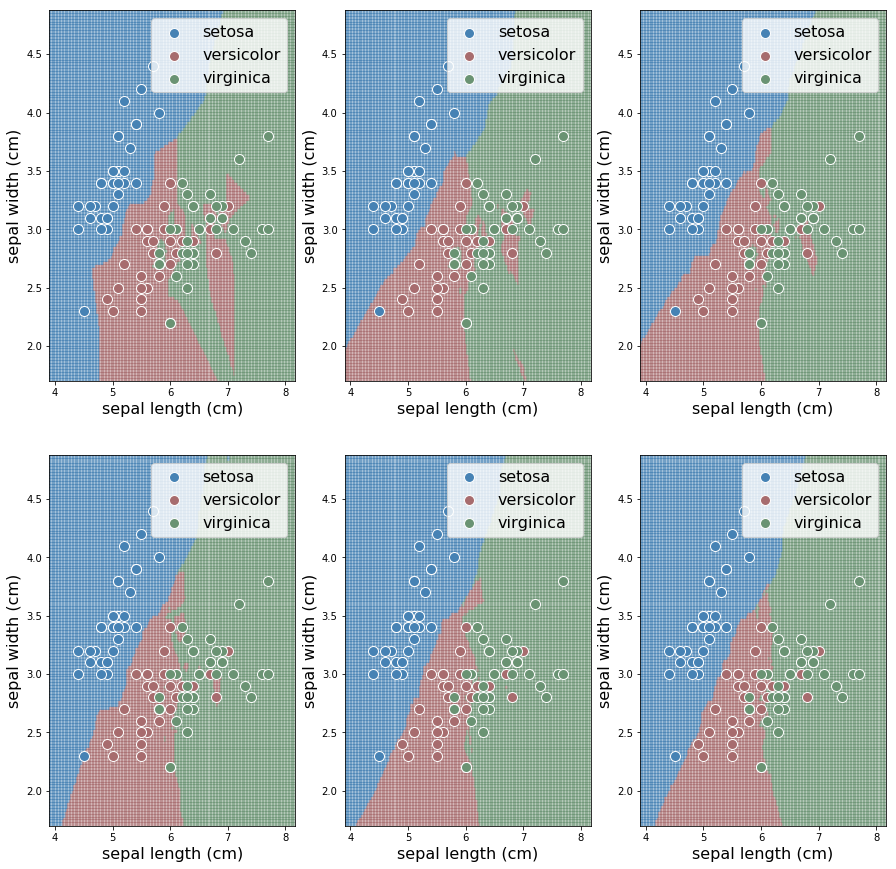

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,15))
ax = ax.reshape(-1)

for idx, k in enumerate(range(1,12, 2)):
    print("Building model with k={}".format(k))
    
    # YOUR CODE HERE
    knn = None
    knn = build_model(X_train, y_train, k)
    
    # Put all your code above this line.
    
    # Here's how to plot multiple sub plots in a clean manner
    plot_knn_boundary(X_train, y_train, knn, fig, ax[idx])

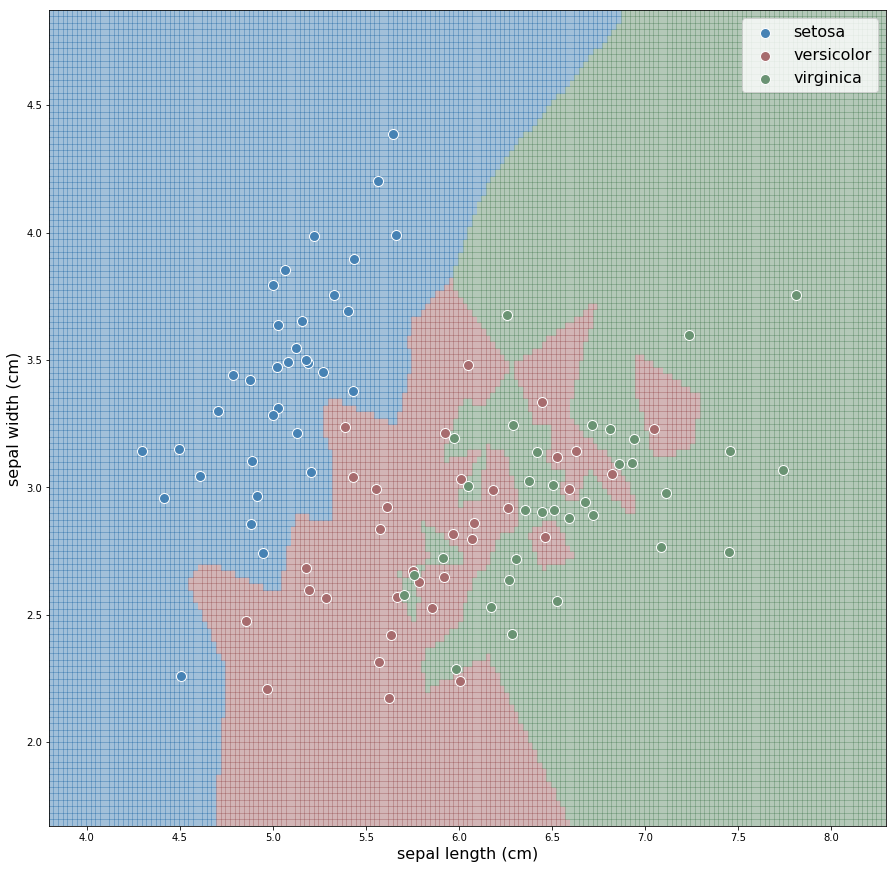

In [16]:
X_train_noised = X_train + 0.1 * np.random.standard_normal(X_train.shape)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
knn = KNeighborsClassifier(1).fit(X_train_noised, y_train)
plot_knn_boundary(X_train_noised, y_train, knn, fig, ax)

**Part D**: Until this point we've been plotting the KNN decision boundary against the training data, but really we're interested in how our model does on the validation set.  The following code will train a 1-NN classifier and plot the decision boundary against the validation data. How many points in total are misclassified?  Which species get confused with each other the most? 

Write code below, then put your answers to the above questions in the "analysis" cell below the code cell.

COMMENTS: Note that it would be wrong in this case to call model.fit(X_valid, y_valid), then plot_knn_boundary(X_valid, y_valid). Several submissions had this. Not sure if it was a type or a misunderstanding. If you're asked to assess performance on a validation set, you can't train on that validaiton set. In this case, you would get 100% accuracy if assess performance on a dataset with a 1-KNN classifier after training on that dataset. If you results show 100% accuracy, that's a big warning you're probably training on your test/validaiton set

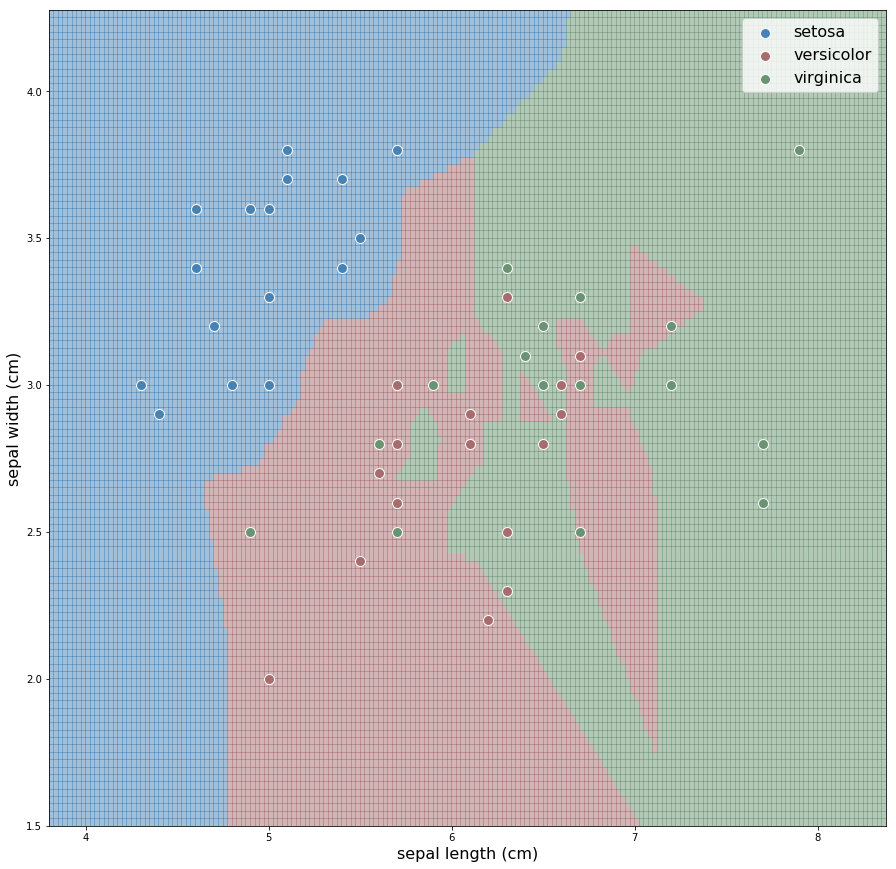

In [17]:
# YOUR CODE HERE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
knn = KNeighborsClassifier(1).fit(X_train, y_train)
plot_knn_boundary(X_valid, y_valid, knn, fig, ax)

YOUR ANSWER HERE

You could have either counted all the mislabeled points or written some code to calculate the number of misclassifications.

**Part E: Confusion Matrix**: Counting misclassified points becomes much more difficult when our data sets are very large.  One convenient method for analyzing misclassification is by constructing the so-called confusion matrix. The confusion matrix is `(# classes)` $\times$ `(# classes)` matrix such that the entry $C_{ij}$ is the number of examples with _true_ label $i$ predicted to have label $j$. 

We can compute the confusion matrix using Scikit-Learn's [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function. Read the documentation and then fill in the missing code to compute the confusion matrix for the validation data and the 1-NN classifier.  Do the entries in $C$ agree (roughly) with the visual counts you made above? 

Step-by-step:
1. Call the `build_model` function that you wrote to create a 1-NN classifier.
2. Call the `predict` method of your classifier on the validation data, `X_valid`
3. Use the confusion matrix method (see the docs) to calculate the matrix.
4. Print the matrix.

In [18]:
from sklearn.metrics import confusion_matrix

def calc_confusion_matrix(nn_model, data_x, data_y):
    ''' calc_confusion_matrix
    Args:
        nn_model : a KNearestNeighbors model, fitted. The output of build_model.
        data_x : Numpy array, data (features) you wish to use as input to the model
        data_y : Numpy array, data (labels) you wish to use as confusion matrix
    '''
    conf_matrix = None
    # Your code here (~2 lines) - predict on data_x, then get conf_matrix between data_y and your predictions
    # YOUR CODE HERE
    y_pred = nn_model.predict(data_x)
    conf_matrix = confusion_matrix(data_y, y_pred)
    return conf_matrix

In [19]:
# Sanity check on k=1 for your code
nn1_model = build_model(X_train, y_train, 1)
conf_matrix = calc_confusion_matrix(nn1_model, X_valid, y_valid)

print("Confusion on validation data, k=1")
print(conf_matrix)

assert(conf_matrix.sum() == X_valid.shape[0])

Confusion on validation data, k=1
[[16  0  0]
 [ 0 10  6]
 [ 0  7  9]]


**Part F**: Vary the number of nearest neighbors used in KNN above and recompute the confusion matrix.  Describe your results. Does there seem to be a particular setting that works better than the others for the validation data ?

In [21]:
for idx, k in enumerate(range(1,12, 2)):
    print("Building model with k={}".format(k))
    
    # YOUR CODE HERE
    knn = build_model(X_train, y_train, k)
    conf_matrix = calc_confusion_matrix(knn, X_valid, y_valid)
    print(conf_matrix)

Building model with k=1
[[16  0  0]
 [ 0 10  6]
 [ 0  7  9]]
Building model with k=3
[[16  0  0]
 [ 0  9  7]
 [ 0  5 11]]
Building model with k=5
[[16  0  0]
 [ 0  8  8]
 [ 0  4 12]]
Building model with k=7
[[16  0  0]
 [ 0  8  8]
 [ 0  4 12]]
Building model with k=9
[[16  0  0]
 [ 0  8  8]
 [ 0  4 12]]
Building model with k=11
[[16  0  0]
 [ 0  7  9]
 [ 0  4 12]]


**Part G: Calculate per-class accuracy**: Now that we have a confusion matrix, we would like to get a summary of our performance for each matrix. One way to do this would be to calculate the miss-classification rate per class. Remember that the rows correspond to labels of validation data. The sum accross the first row corresponds to the total number of elements in the first class in the validation data. 

Now, write a function to calculate the per class missclassification rate. It should be a single 3-element vector.

HINT: If you have trouble with this, be sure to do the Numpy review as described in Homework 0. There are any numbers to do this, but we used 1x .sum(), 1x np.diag() and one division operation on the matrix.

In [26]:
def get_per_class_miss_rate(conf_matrix):
    '''
    get_per_class_miss_rate
    Args:
        conf_matrix - a MxM Numpy array, the output of calc_confusion_matrix
    '''
    per_class_miss_rate = np.zeros((3,))
    
    # YOUR CODE HERE
    per_class_totals = conf_matrix.sum(axis=1)
    per_class_miss_rate = (per_class_totals - np.diag(conf_matrix))/per_class_totals
    ### END SOLUTION
    return per_class_miss_rate 

In [27]:
# Sanity check your code:
nn_model = build_model(X_train, y_train, 3)
cm = calc_confusion_matrix(nn_model, X_valid, y_valid)
miss_rates = get_per_class_miss_rate(cm)
print(miss_rates)
assert((miss_rates==[0.0, 0.4375, 0.3125]).all())

[0.     0.4375 0.3125]


In [28]:
# Print the per-class error rates for different values of k
for idx, k in enumerate(range(1,12, 2)):
    print("Building model with k={}".format(k))
    knn = build_model(X_train, y_train, k)
    cm = calc_confusion_matrix(knn, X_valid, y_valid)
    pcmr = get_per_class_miss_rate(cm)
    print("Per class miss-classification: {}".format(pcmr))

Building model with k=1
Per class miss-classification: [0.     0.375  0.4375]
Building model with k=3
Per class miss-classification: [0.     0.4375 0.3125]
Building model with k=5
Per class miss-classification: [0.   0.5  0.25]
Building model with k=7
Per class miss-classification: [0.   0.5  0.25]
Building model with k=9
Per class miss-classification: [0.   0.5  0.25]
Building model with k=11
Per class miss-classification: [0.     0.5625 0.25  ]


In [1]:

import numpy as np
import matplotlib.pylab as plt
import pickle
import gzip
from sklearn.datasets import fetch_openml, load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
class Numbers:
    """
    Class to store MNIST data
    """
    def __init__(self, location):
        # store for use later  
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
        
        # Convert the labels to numeric labels
        labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        for idx, l in enumerate(labels):
            y[y == l] = idx
        y = y.astype(np.int32)
            
                        
        self.train_x, self.train_y = X[:50000,:], y[:50000]

        self.test_x, self.test_y = X[60000:,:], y[60000:]
        
DATA_PATH = "mnist.pklz"
data = Numbers(DATA_PATH)

In [5]:
#### Libraries
# Standard library
# import cPickle

# Third-party libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def main():
    training_set = data.train_x
    validation_set =data.train_y
    test_set = data.test_x
    images = get_images(training_set)
    plot_mnist_digit(images[0])

#### Plotting
def plot_images_together(images):
    """ Plot a single image containing all six MNIST images, one after
    the other.  Note that we crop the sides of the images so that they
    appear reasonably close together."""
    fig = plt.figure()
    images = [image[:, 3:25] for image in images]
    image = np.concatenate(images, axis=1)
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in xrange(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(images[j-1], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_2_and_1(images):
    "Plot a 2 and a 1 image from the MNIST set."
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    ax.matshow(images[5], cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 2, 2)
    ax.matshow(images[3], cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_top_left(image):
    "Plot the top left of ``image``."
    image[14:,:] = np.zeros((14,28))
    image[:,14:] = np.zeros((28,14))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_features(image):
    "Plot the top right, bottom left, and bottom right of ``image``."
    image_1, image_2, image_3 = np.copy(image), np.copy(image), np.copy(image)
    image_1[:,:14] = np.zeros((28,14))
    image_1[14:,:] = np.zeros((14,28))
    image_2[:,14:] = np.zeros((28,14))
    image_2[:14,:] = np.zeros((14,28))
    image_3[:14,:] = np.zeros((14,28))
    image_3[:,:14] = np.zeros((28,14))
    fig = plt.figure()
    ax = fig.add_subplot(1, 3, 1)
    ax.matshow(image_1, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 3, 2)
    ax.matshow(image_2, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 3, 3)
    ax.matshow(image_3, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

#### Miscellanea
def load_data():
    """ Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data."""
    f = open('../../data/mnist.pkl', 'rb')
    training_set, validation_set, test_set = cPickle.load(f)
    f.close()
    return (training_set, validation_set, test_set)

def get_images(training_set):
    """ Return a list containing the first six images from the MNIST
    data set. Each image is represented as a 2-d numpy array."""
    flattened_images = training_set[0][:6]
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

#### Main
if __name__ == "__main__":
    main()

ValueError: cannot reshape array of size 1 into shape (28)